<a href="https://colab.research.google.com/github/bcaffo/ds4bme_intro/blob/master/notebooks/Intro_to_DFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FFT
## Abstract notations
### History
The Fourier transform is one of the key tools in Biomedical Data Science. Its namesake is [Jean Baptiste Fourier](https://en.wikipedia.org/wiki/Joseph_Fourier), who was a 18th century French mathemetician who made fundamental discoveries into harmonic analysis. Its fair to say that Fourier's discoveries are some of the most fundamental in all of a mathematics and engineering and is the foundation for signal processing.

One of his main discoveries was the Fourier series, the idea that a function can be  decomposed into building blocks of trigonometric functions. 

### Some notation
Let $<,>$ be a so-called inner product. For example $<a, b> = \sum_{m=1}^n a_m b_m$ if $a$ and $b$ are two vectors. But, $<a, b>=\int_0^1 a(t)b(t)dt$ if $a$ and $b$ are two functions on $[0,1]$. (There is a nice generality between Fourier results on data and Fourier results on functions and other spaces. However, we'll largely focus on discrete data, so think of the first definition.) We can define the norm as $<a, a> = ||a||^2$, so that, the distance between two vectors is $||a-b||$. 

Consider a basis, that is a set of vectors, $b_k$ so that $||b_k|| = 1$ and $<b_k, b_j>= I(k=j)$ and the set of vectors, ${\cal H}$, that can be written as $\sum_{k=1}^k b_k c_k$ for some constants $c_k$, then for any element $x\in H$ we have that the best approximation using any subset of the indices, $S$, is of the form
$$
\sum_{k\in S} b_k <b_k, x>.
$$
For real vectors and the basis we consider, every vector can be written as a sum of the basis elements. You can have weird functions that can't be written out as sums of the basis elements, but they're weird functions. 

## More practically
The basis we're interested in is $b_k$ which has element $m$ equal to $e^{-2\pi i m k/n} = \cos(2\pi mk/n) + i \sin (2\pi mk / n)$ for $k=0,..., n-1$. Here, notice, we quit using the index $i$ since now it stands for the complex unit.
This basis satisfies our rules of $<b_k, b_j> = I(j=k)$ and having norm 1. So that, given any vector $x$, our best approximation to it is
$$
\sum_{k=0}^{n-1} b_k <b_k, x> = \sum_{k=0}^{n-1} b_k F_k
$$
where 
$$
F_k = \sum_{m=0}^{n-1} x_m e^{-2\pi i m k / n}
= \sum_{m=0}^{n-1} x_m [\cos(2\pi m k / n) + i \sin(2\pi m k / n)].
$$
The collection of elements, $F = (F_0, \ldots F_{n-1})$ are called the (discrete) Fourier coeficients and the operation that takes $x$ and converts it into $F$ is called the (discrete) Fourier transform.

Let's consider  the case where $x=(1 ~4 ~9 ~16)'$. So then


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
x = np.arange(1,5,1) ** 2
x
t = np.arange(0, 4, 1)
t
n = 4
F0 = np.sum(x * np.exp(-2 * 1j * np.pi * t * 0 / n))
F1 = np.sum(x * np.exp(-2 * 1j * np.pi * t * 1 / n))
F2 = np.sum(x * np.exp(-2 * 1j * np.pi * t * 2 / n))
F3 = np.sum(x * np.exp(-2 * 1j * np.pi * t * 3 / n))

np.round([F0, F1, F2, F3], 3)

array([ 30. +0.j,  -8.+12.j, -10. -0.j,  -8.-12.j])

In [65]:
F = np.fft.fft(x)
F

array([ 30. +0.j,  -8.+12.j, -10. +0.j,  -8.-12.j])

Let's give a more realistic example. Consider two cosine waves, one fast, one slow. Let's add them together and see if the FFT can figure out what we've done.

<function matplotlib.pyplot.show>

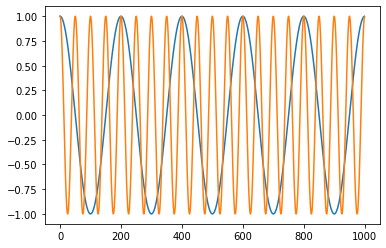

In [66]:
n = 1000
t = np.arange(0, n, 1)
c1 = np.cos(2 * np.pi * t * 5 / n)
c2 = np.cos(2 * np.pi * t * 20 / n)
plt.plot(t, c1)
plt.plot(t, c2)
plt.show

 

<function matplotlib.pyplot.show>

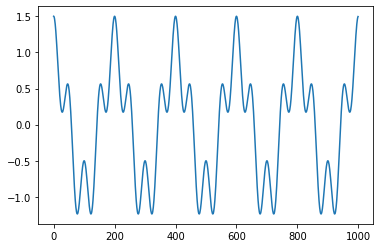

In [67]:
x = c1 + .5 * c2
plt.plot(t, x)
plt.show


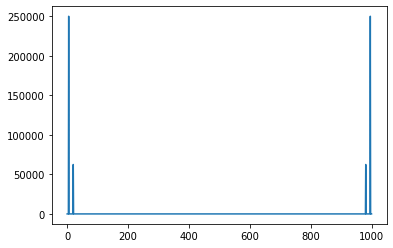

(array([  5,  20, 980, 995]),)

In [72]:
a = np.fft.fft(x)
b = a.real ** 2 + a.imag ** 2
plt.plot(b)
plt.show()
np.where(b > 1e-5)

### Some notes
We can go backwards from the Fourier coefficients to the signal using the inverse transform. Also, for real signals sometimes people will multiply the signal by $(-1)^t$ in order for the plot of the norm of the coeficients (the power spectrum as its called) to look nicer.

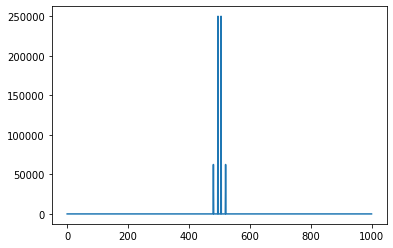

In [73]:
## Plotting the spectrum so that it's in the middle
a = np.fft.fft(x * (-1) ** t)
b = a.real ** 2 + a.imag ** 2
plt.plot(b)
plt.show()


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


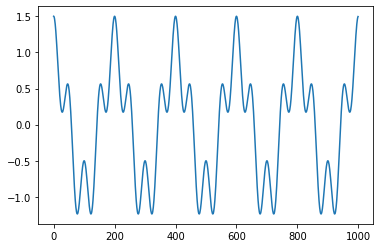

In [70]:
## demonstrating going backwards
a = np.fft.fft(x)
b = np.fft.ifft(a)

plt.plot(b)
plt.show()


### Filtering

Filtering is the process of allowing certain frequency bands to be retained while others to be discarded. Imagine in our case that we want the low frequency band to pass and to get rid of the higher frequency. In this case we want a low pass filter. There's a lot of ways to filter signals, but let's just do it by simple thresholding. The slightly tricky thing about this in practical problems, is making sure that you're filtering at the frequencies that you want to. As an example, we have 1,000 time points. Say one time point is 1/100 of a second so that we have ten second of data. We have two cosine functions, one that is at 5 oscillations per 10 seconds (0.5 Hz) and one at 20 oscillations per 10 seconds (2 hz). Let's filter out anything ove 0.5 Hz.

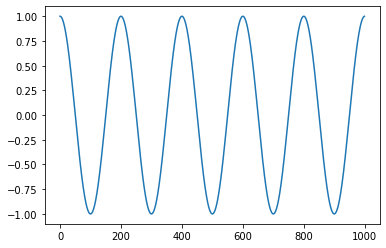

In [71]:
## demonstrating hard filtering
a = np.fft.fft(x)
n = a.size
timestep = 1/100
## a function that shows what the frequencies are in the units you want
w = np.fft.fftfreq(n, timestep)


b = a
b[(abs(w) > .5)] = 0
c = np.fft.ifft(b).real
plt.plot(c)
plt.show()